# DATABASE

In [2]:
import psycopg2
import pandas as pd
import numpy as np
from datetime import datetime
from sqlalchemy import create_engine
import psycopg2.extras as extras

In [3]:
df = pd.read_csv('all_races2.csv', low_memory=False, delimiter=',')
df.head()

,place,age_class,place_in_class,bib,name,sex,nation,team,official_time,net_time,birth_date,event,event_year,distance
0,1,M20,1,1,Rui Pedro Silva,M,PT,Individual,00:29:56,00:29:53,1992-01-01,dia-do-pai,2012,10
1,2,M20,2,184,Paulo Gomes,M,PT,Individual,00:29:58,00:29:58,1992-01-01,dia-do-pai,2012,10
2,3,M20,3,3,Bruno Albuquerque,M,PT,Sporting C P,00:30:20,00:30:18,1992-01-01,dia-do-pai,2012,10
3,4,M20,4,84,Manuel Sousa,M,PT,C I Argoncilhe,00:31:27,00:31:25,1972-04-01,dia-do-pai,2012,10
4,5,M20,5,4,Luis Mendes,M,PT,Cyclones Sanitop,00:31:46,00:31:45,1992-01-01,dia-do-pai,2012,10


In [85]:
df.shape

(293858, 14)

In [4]:
dfteam = df[['team']].copy()
teams = dfteam.drop_duplicates().reset_index(drop=True)
teams['team_id'] = np.arange(1, 1 + len(teams))
teams



,team,team_id
0,Individual,1
1,Sporting C P,2
2,C I Argoncilhe,3
3,Cyclones Sanitop,4
4,Edp Clube Pessoal,5
...,...,...
11218,Unicer - Unicer - Jzoi6s,11219
11219,Defreitas11,11220
11220,Doidos Pelo Natal,11221
11221,"Go Baby, Go",11222


In [5]:
dfathletes = df[['name', 'birth_date', 'sex', 'nation', 'team']].copy().drop_duplicates(subset=['name', 'birth_date', 'sex', 'nation']).reset_index(drop=True)
dfathletes['athlete_id'] = np.arange(1, 1 + len(dfathletes))
dfathletes = pd.merge(dfathletes, teams, on='team', how='left')
athletes = dfathletes.drop(columns=['team'])
athletes

,name,birth_date,sex,nation,athlete_id,team_id
0,Rui Pedro Silva,1992-01-01,M,PT,1,1
1,Paulo Gomes,1992-01-01,M,PT,2,1
2,Bruno Albuquerque,1992-01-01,M,PT,3,2
3,Manuel Sousa,1972-04-01,M,PT,4,3
4,Luis Mendes,1992-01-01,M,PT,5,4
...,...,...,...,...,...,...
64272,Pedro Fernandes,1988-08-31,M,PT,64273,11167
64273,Luisa Fernandes,1965-06-23,F,PT,64274,11223
64274,Susana Marques,1983-04-18,F,PT,64275,7700
64275,Teresa Pais,1981-02-26,F,PT,64276,7700


In [6]:
dfevents = df[['event', 'event_year', 'distance']].copy()
events = dfevents.drop_duplicates().reset_index(drop=True)
events['event_id'] = np.arange(1, len(events) + 1)
events


,event,event_year,distance,event_id
0,dia-do-pai,2012,10,1
1,dia-do-pai,2013,10,2
2,dia-do-pai,2014,10,3
3,dia-do-pai,2015,10,4
4,dia-do-pai,2016,10,5
5,dia-do-pai,2017,10,6
6,family-race,2012,15,7
7,family-race,2013,16,8
8,family-race,2014,16,9
9,family-race,2015,15,10


In [7]:
df2 = athletes
dfresults = df.drop_duplicates().reset_index(drop=True)
results = dfresults
results['net_time'] = results['net_time'].replace(np.nan, '00:00:00', regex=True)
results = pd.merge(results, df2, on=['name', 'birth_date', 'sex', 'nation'], how='left')
results = pd.merge(results, events, right_on=['event', 'event_year', 'distance'], left_on=['event', 'event_year', 'distance'], how='left')
results = results.drop(columns=['name', 'birth_date', 'team', 'sex', 'nation', 'event', 'event_year', 'distance'])
results['result_id'] = np.arange(1, 1 + len(results))
results

,place,age_class,place_in_class,bib,official_time,net_time,athlete_id,team_id,event_id,result_id
0,1,M20,1,1,00:29:56,00:29:53,1,1,1,1
1,2,M20,2,184,00:29:58,00:29:58,2,1,1,2
2,3,M20,3,3,00:30:20,00:30:18,3,2,1,3
3,4,M20,4,84,00:31:27,00:31:25,4,3,1,4
4,5,M20,5,4,00:31:46,00:31:45,5,4,1,5
...,...,...,...,...,...,...,...,...,...,...
146918,8791,F20,1027,9706,01:43:37,01:34:55,46360,7700,36,146919
146919,8792,F35,512,9702,01:43:37,01:34:56,64276,7700,36,146920
146920,8793,M20,2039,9705,01:43:37,01:34:56,11436,699,36,146921
146921,8794,F40,789,12149,01:57:32,01:57:32,64277,699,36,146922


In [7]:
results.isnull().sum()

place             0
age_class         5
place_in_class    0
bib               0
official_time     0
net_time          0
athlete_id        0
team_id           0
event_id          0
result_id         0
dtype: int64

In [8]:
teams = teams.rename(columns={"team":"name"})
events = events.rename(columns={"event":"name"})


In [ ]:
#athletes
#teams
#events
#results

,name,team_id,athlete_id
0,Individual,1,1
1,Individual,1,2
2,Individual,1,9
3,Individual,1,13
4,Individual,1,18
...,...,...,...
92420,Doidos Pelo Natal,11221,92413
92421,Doidos Pelo Natal,11221,92414
92422,Doidos Pelo Natal,11221,92415
92423,"Go Baby, Go",11222,92418


In [206]:
#connect to database
try:
    con = psycopg2.connect(
        database = 'fced_vitor_pereira',
        user = 'fced_vitor_pereira',
        password = 'vepdatabase77',
        host = 'dbm.fe.up.pt',
        port = '5433',
        options='-c search_path=public'
    )
except:
    print('You must be connected to FEUP VPN')
else:
    print('Connection sucessful!')

Connection sucessful!


In [ ]:
cur = con.cursor()
cur.execute("""DELETE FROM athletes;
DELETE FROM team;
DELETE FROM event;
DELETE FROM results;""")
con.commit()
print('Data deleted.')

In [86]:
cur = con.cursor()

for row in teams.itertuples():
    cur.execute(f"INSERT INTO team (name, team_id) VALUES (%s, %s)",
    (row.name, row.team_id))
con.commit()
print('Completed!')

In [111]:
cur = con.cursor()

for row in athletes.itertuples():
    cur.execute(f"INSERT INTO athlete (athlete_id, name, birth_date, sex, nation, team_id) VALUES (%s, %s, %s, %s, %s, %s)",
    (row.athlete_id, row.name, row.birth_date, row.sex, row.nation, row.team_id))
con.commit()

print('Completed!')


In [189]:
cur = con.cursor()

for row in events.itertuples():
    cur.execute(f"INSERT INTO event (name, event_year, distance, event_id) VALUES (%s, %s, %s, %s)",
    (row.name, row.event_year, row.distance, row.event_id))
con.commit()
print('Completed!')

In [8]:
cur = con.cursor()

for row in results.itertuples():
    cur.execute(f"""INSERT INTO results (result_id, place, place_in_class, net_time, official_time, age_class,
    event_id, athlete_id, bib, team_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""",
    (row.result_id, row.place, row.place_in_class, row.net_time, row.official_time, row.age_class, row.event_id,
    row.athlete_id, row.bib, row.team_id))
con.commit()
con.close()
print('Completed!')


Completed!


# EXTRA

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [9]:
df2 = df
df2.drop_duplicates().reset_index(drop=True)
df3 = df2[(df2['event'] == 'maratona') & (df2['place'] == 1)]
df3

,place,age_class,place_in_class,bib,name,sex,nation,team,official_time,net_time,birth_date,event,event_year,distance
42215,1,M20,1,4,Anthony Kauithu Wairuri,M,KE,Quenia,02:12:14,02:12:14,1992-01-01,maratona,2012,42
43886,1,M20,1,19,Joash Kipkoech Mutai,M,KE,Individual,02:13:04,02:13:01,1993-01-01,maratona,2013,42
46649,1,M20,1,18,Workneh Fikre Serbessa,M,ET,NaN,02:13:10,02:13:10,1992-10-28,maratona,2014,42
50688,1,M20,1,4,Gilbert Yegon Koech,M,KE,NaN,02:14:04,02:14:00,1993-10-23,maratona,2015,42
55094,1,M20,1,4,Samuel Theuri Mwaniki,M,KE,NaN,02:11:48,02:11:45,1984-01-01,maratona,2016,42
189144,1,M20,1,4,Anthony Kauithu Wairuri,M,KE,Quenia,02:12:14,02:12:14,1992-01-01,maratona,2012,42
190815,1,M20,1,19,Joash Kipkoech Mutai,M,KE,Individual,02:13:04,02:13:01,1993-01-01,maratona,2013,42
193578,1,M20,1,18,Workneh Fikre Serbessa,M,ET,NaN,02:13:10,02:13:10,1992-10-28,maratona,2014,42
197617,1,M20,1,4,Gilbert Yegon Koech,M,KE,NaN,02:14:04,02:14:00,1993-10-23,maratona,2015,42
202023,1,M20,1,4,Samuel Theuri Mwaniki,M,KE,NaN,02:11:48,02:11:45,1984-01-01,maratona,2016,42


[Text(0.5, 1.0, 'Maraton evolution through years'),
 Text(0.5, 0, 'Event year'),
 Text(0, 0.5, 'Official time')]

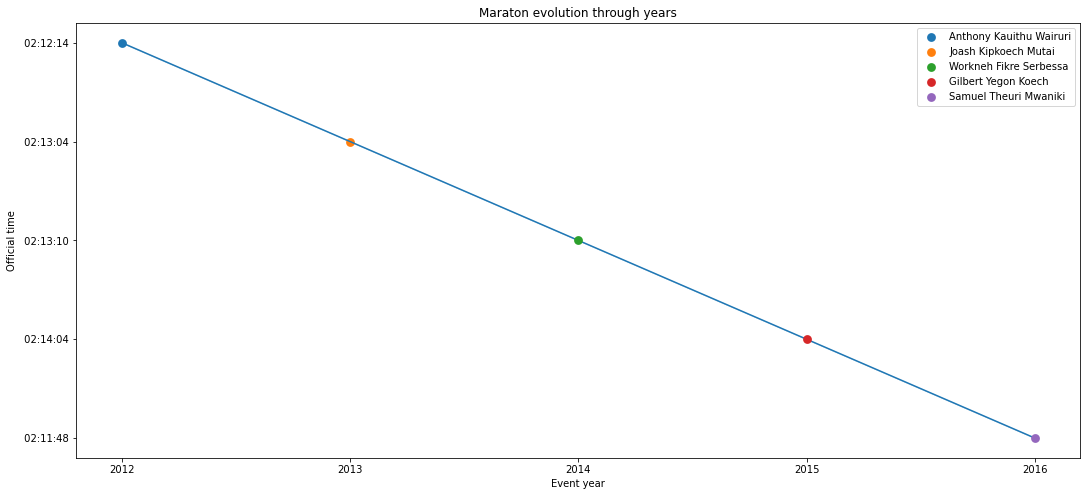

In [53]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.pointplot(x=df3.event_year, y=df3.official_time, hue=df3.name)
ax1.set_xticks(range(2012,2017,1))
sns.lineplot(x=df3.event_year, y=df3.official_time)
ax1.set(title='Maraton evolution through years', xlabel='Event year', ylabel='Official time')

In [14]:
df4 = df
df2.drop_duplicates().reset_index(drop=True)
df4 = df4[(df4['event'] == 'family-race') & (df4['place'] == 1)]
df4

,place,age_class,place_in_class,bib,name,sex,nation,team,official_time,net_time,birth_date,event,event_year,distance
24532,1,FRM35,1,2761,Luis Feiteira,M,PT,Rb Running,00:50:21,00:50:21,1973-04-21,family-race,2012,15
26889,1,M20,1,3891,Helder Santos,M,PT,Maia Atletico Clube,00:49:33,00:49:30,1983-10-06,family-race,2013,16
29309,1,M35,1,8001,Paulo Gomes,M,PT,Cua Benaventense,00:50:21,00:50:20,1973-05-15,family-race,2014,16
31672,1,M20,1,8001,Rui Pedro Silva,M,PT,S L Benfica,00:44:41,00:44:41,1981-05-06,family-race,2015,15
34366,1,M20,1,8314,Helder Santos,M,PT,Sporting C P,00:45:49,00:45:48,1983-10-06,family-race,2016,15
171461,1,FRM35,1,2761,Luis Feiteira,M,PT,Rb Running,00:50:21,00:50:21,1973-04-21,family-race,2012,15
173818,1,M20,1,3891,Helder Santos,M,PT,Maia Atletico Clube,00:49:33,00:49:30,1983-10-06,family-race,2013,16
176238,1,M35,1,8001,Paulo Gomes,M,PT,Cua Benaventense,00:50:21,00:50:20,1973-05-15,family-race,2014,16
178601,1,M20,1,8001,Rui Pedro Silva,M,PT,S L Benfica,00:44:41,00:44:41,1981-05-06,family-race,2015,15
181295,1,M20,1,8314,Helder Santos,M,PT,Sporting C P,00:45:49,00:45:48,1983-10-06,family-race,2016,15


[Text(0.5, 1.0, 'Family race evolution through years'),
 Text(0.5, 0, 'Event year'),
 Text(0, 0.5, 'Official time')]

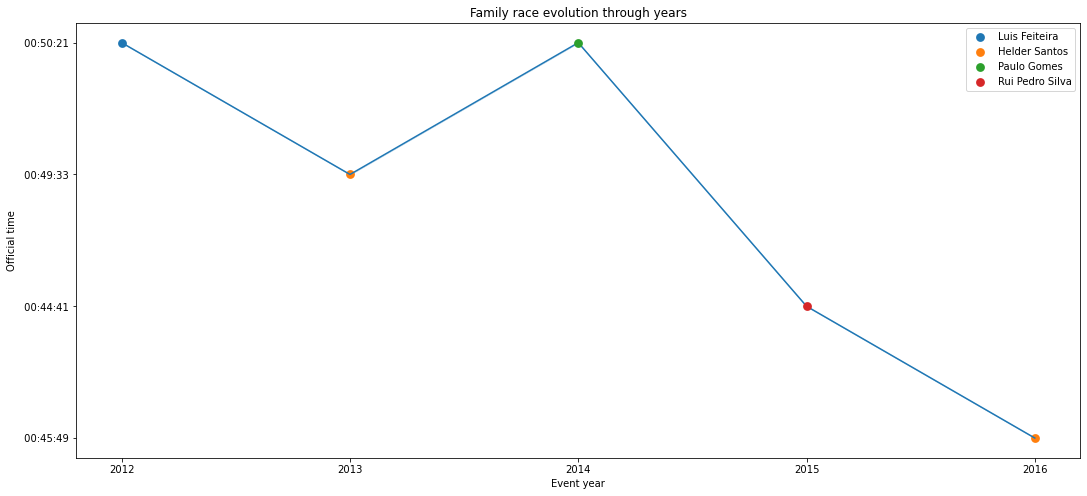

In [52]:
f, ax2 = plt.subplots(ncols=1, figsize=(18,8))
sns.pointplot(x=df4.event_year, y=df4.official_time, hue=df4.name)
sns.lineplot(x=df4.event_year, y=df4.official_time)
ax2.set_xticks(range(2012,2017,1))
ax2.set(title='Family race evolution through years', xlabel='Event year', ylabel='Official time')


In [26]:
df2['nation'].value_counts()

PT    272970
ES      6930
FR      4862
BR      1188
DE      1168
       ...  
TN         2
CY         2
SL         2
AX         2
AF         2
Name: nation, Length: 106, dtype: int64

In [25]:
df2['nation'].unique()
#106

array(['PT', 'RO', 'BR', 'ES', 'AO', 'AT', 'DE', 'FR', 'VE', 'DK', 'CR',
       'IT', 'EE', 'TR', 'CO', 'GB', 'BE', 'EG', 'CH', 'RU', 'PL', 'AG',
       'ZA', 'US', 'IE', 'LT', 'NO', 'MZ', 'CZ', 'RS', 'AX', 'NL', 'CV',
       'UA', 'LU', 'GW', 'PR', 'SK', 'BO', 'HR', 'LI', 'IO', 'UY', 'JP',
       'AL', 'NZ', 'HU', 'CA', 'SE', 'FI', 'AU', 'IN', 'MX', 'MA', 'CU',
       'LV', 'CN', 'TW', 'SI', 'MT', 'AR', 'GR', 'PH', 'MD', 'KE', 'ET',
       'AD', 'HK', 'SL', 'CY', 'BY', 'IL', 'TN', 'FJ', 'PA', 'DJ', 'SA',
       'BG', 'UG', 'PY', 'MO', 'ER', 'GM', 'GE', 'UK', 'NE', 'MC', 'BU',
       'TD', 'SN', 'DZ', 'EC', 'MY', 'CS', 'PE', 'CL', 'GL', 'VG', 'RE',
       'GA', 'NC', 'QA', 'ST', 'TL', 'BH', 'AF'], dtype=object)

[Text(0.5, 1.0, 'Frequency difference by sex'), Text(0.5, 0, 'Sex')]

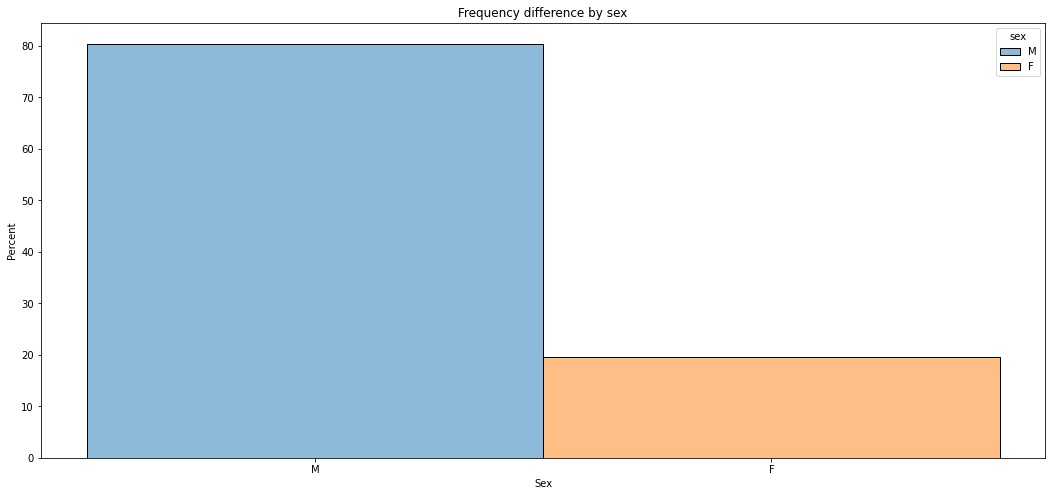

In [51]:
f, ax3 = plt.subplots(ncols=1, figsize=(18,8))
sns.histplot(x=df2.sex, stat='percent', hue=df2.sex)

ax3.set(title='Frequency difference by sex', xlabel='Sex')

[Text(0.5, 1.0, 'Total number of athletes by year'),
 Text(0.5, 0, 'Event year')]

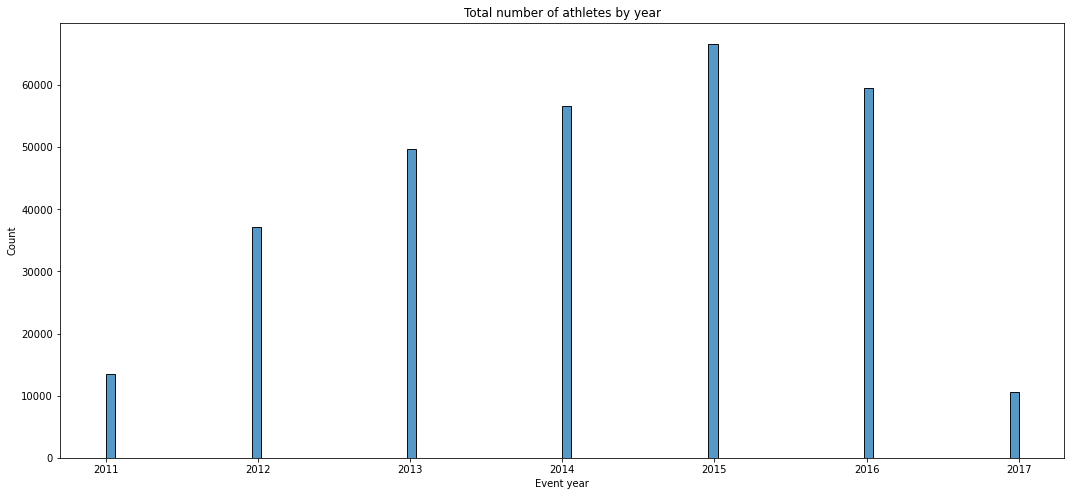

In [49]:
f, ax3 = plt.subplots(ncols=1, figsize=(18,8))
sns.histplot(x=df2.event_year)
ax3.set(title='Total number of athletes by year', xlabel='Event year')

## Conclusions

Though this brief analysis, It is possible to conclude that:

- The race time of the two analysed races, in general, improved over the last years. In family race, nowadays, the official time is 5 minutes less than the first record. This is a huge achievement. Maraton, as expected, is a distance dominated by Africans as usual.
- Over the last years, this races welcomed people from 106 different countries, which shows the multiculturality. I think this is a reason to be proud. Portugal is the most representative country, as expected, with more than 250k athletes.
- Not so proud is the imbalaced between gender, as men are 80 percent of total athletes.
- In general, the total number of athletes increased over the years. 2017 is not a representative year, because there was only one race.